In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### The goal of the analysis
Prepare the data for machine learning models or further analysis, focusing on identifying the key factors most correlated with employee attrition.


# Porject outlines
### 1) Dataset Description
### 2)  Data visualization
### 3) data cleaning and feature engineering
### 4) Key Findings of the data

## Dataset Description
* Title: IBM HR Analytics Employee Attrition & Performance


* Abstract: The IBM HR Analytics Employee Attrition & Performance dataset on Kaggle includes data for analyzing employee attrition.


* Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion?sort=hotness

* Contents: It contains various employee attributes such as age, gender, job role, satisfaction level ... etc


In [2]:
# loading the data
data = pd.read_csv('IBMHR.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
 # more info about the dataset
 data.shape,data.columns

((1470, 35),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'))

#  Data visualization
## 1) Numeric data
* Looking at some important central tendencies of the data
* Use histograms to understand distributions
* corrplot to understand the relationships between variables in numeric data

In [4]:
# first looking at null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

it seems that that the data does  not have missing values but still need cleaning

In [ ]:
# some important central tendencies
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


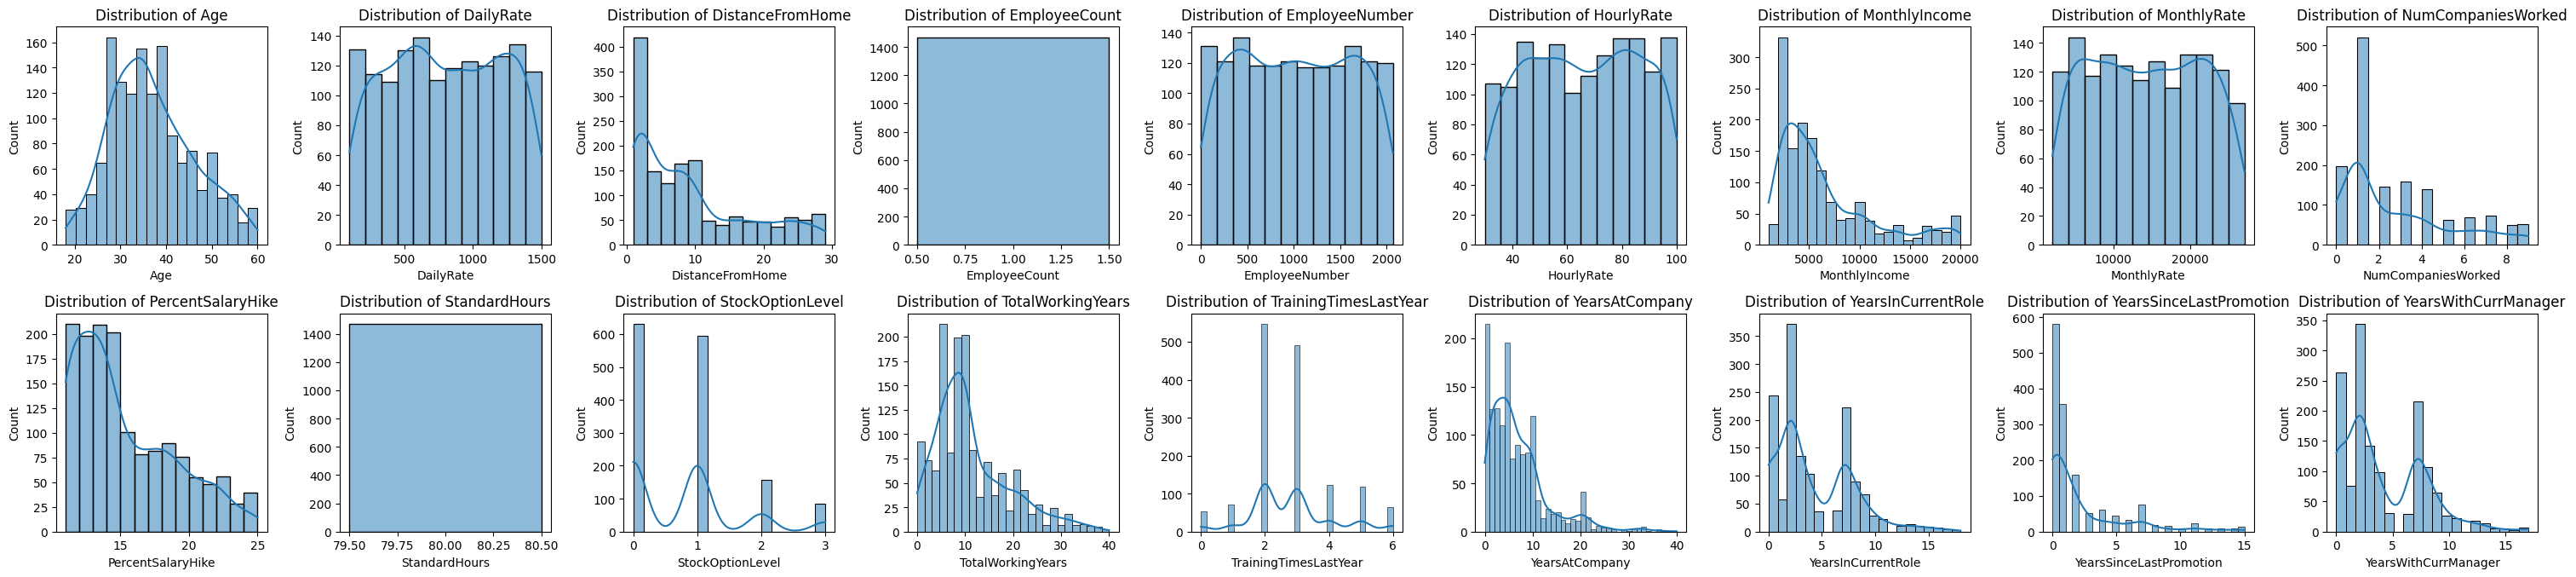

In [ ]:
# histograms to understand distributions
numeric_cols = data.select_dtypes(include = ['int64','float64']).drop(data[['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                                                                          'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                                                                          'WorkLifeBalance','JobLevel']],axis=1)                                  ## becouse this columns are categorical data
plt.figure(figsize=(30, 30))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(9,9,i)
    sns.histplot(data[col],kde =True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

 `EmployeeCount` and `StandardHours` each have only one unique value across the dataset, these columns may not provide any meaningful variation or insight for analysis.
  
 ---


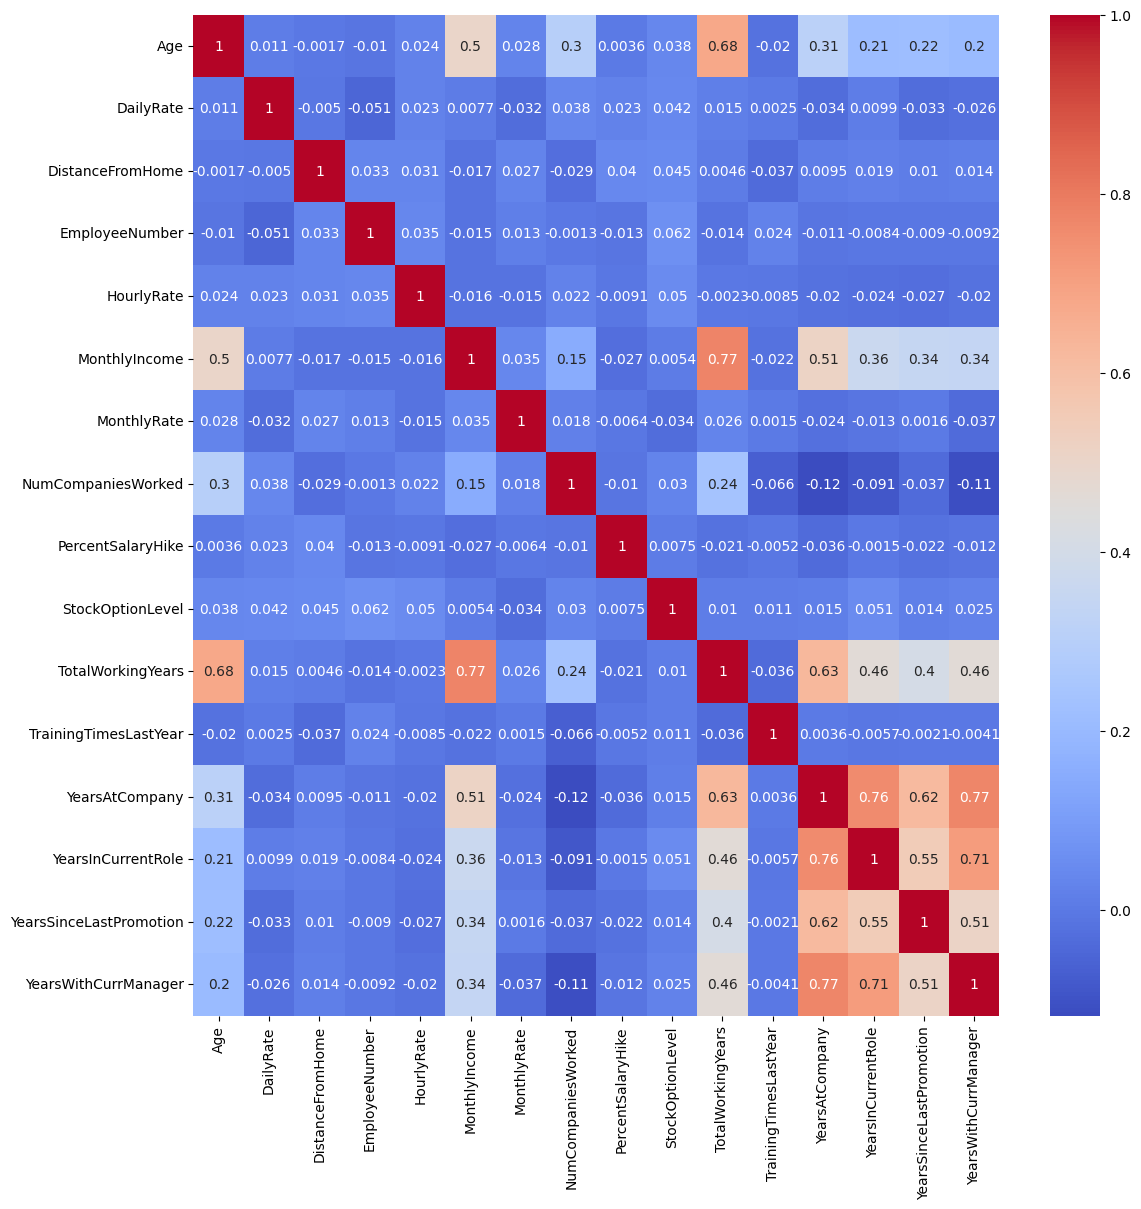

In [ ]:
# corrplot to understand the relationships between variables in numeric data(heat map)

corr_mat = numeric_cols.drop(['EmployeeCount' , 'StandardHours'],axis =1).corr()
plt.figure(figsize =(13,13))
sns.heatmap(corr_mat,annot= True,cmap='coolwarm')
plt.show()


# 2) categorical data

- count plot to see the frequency or count of each category
- plot the relationship between each unique value of categorical variables and the number of survivors


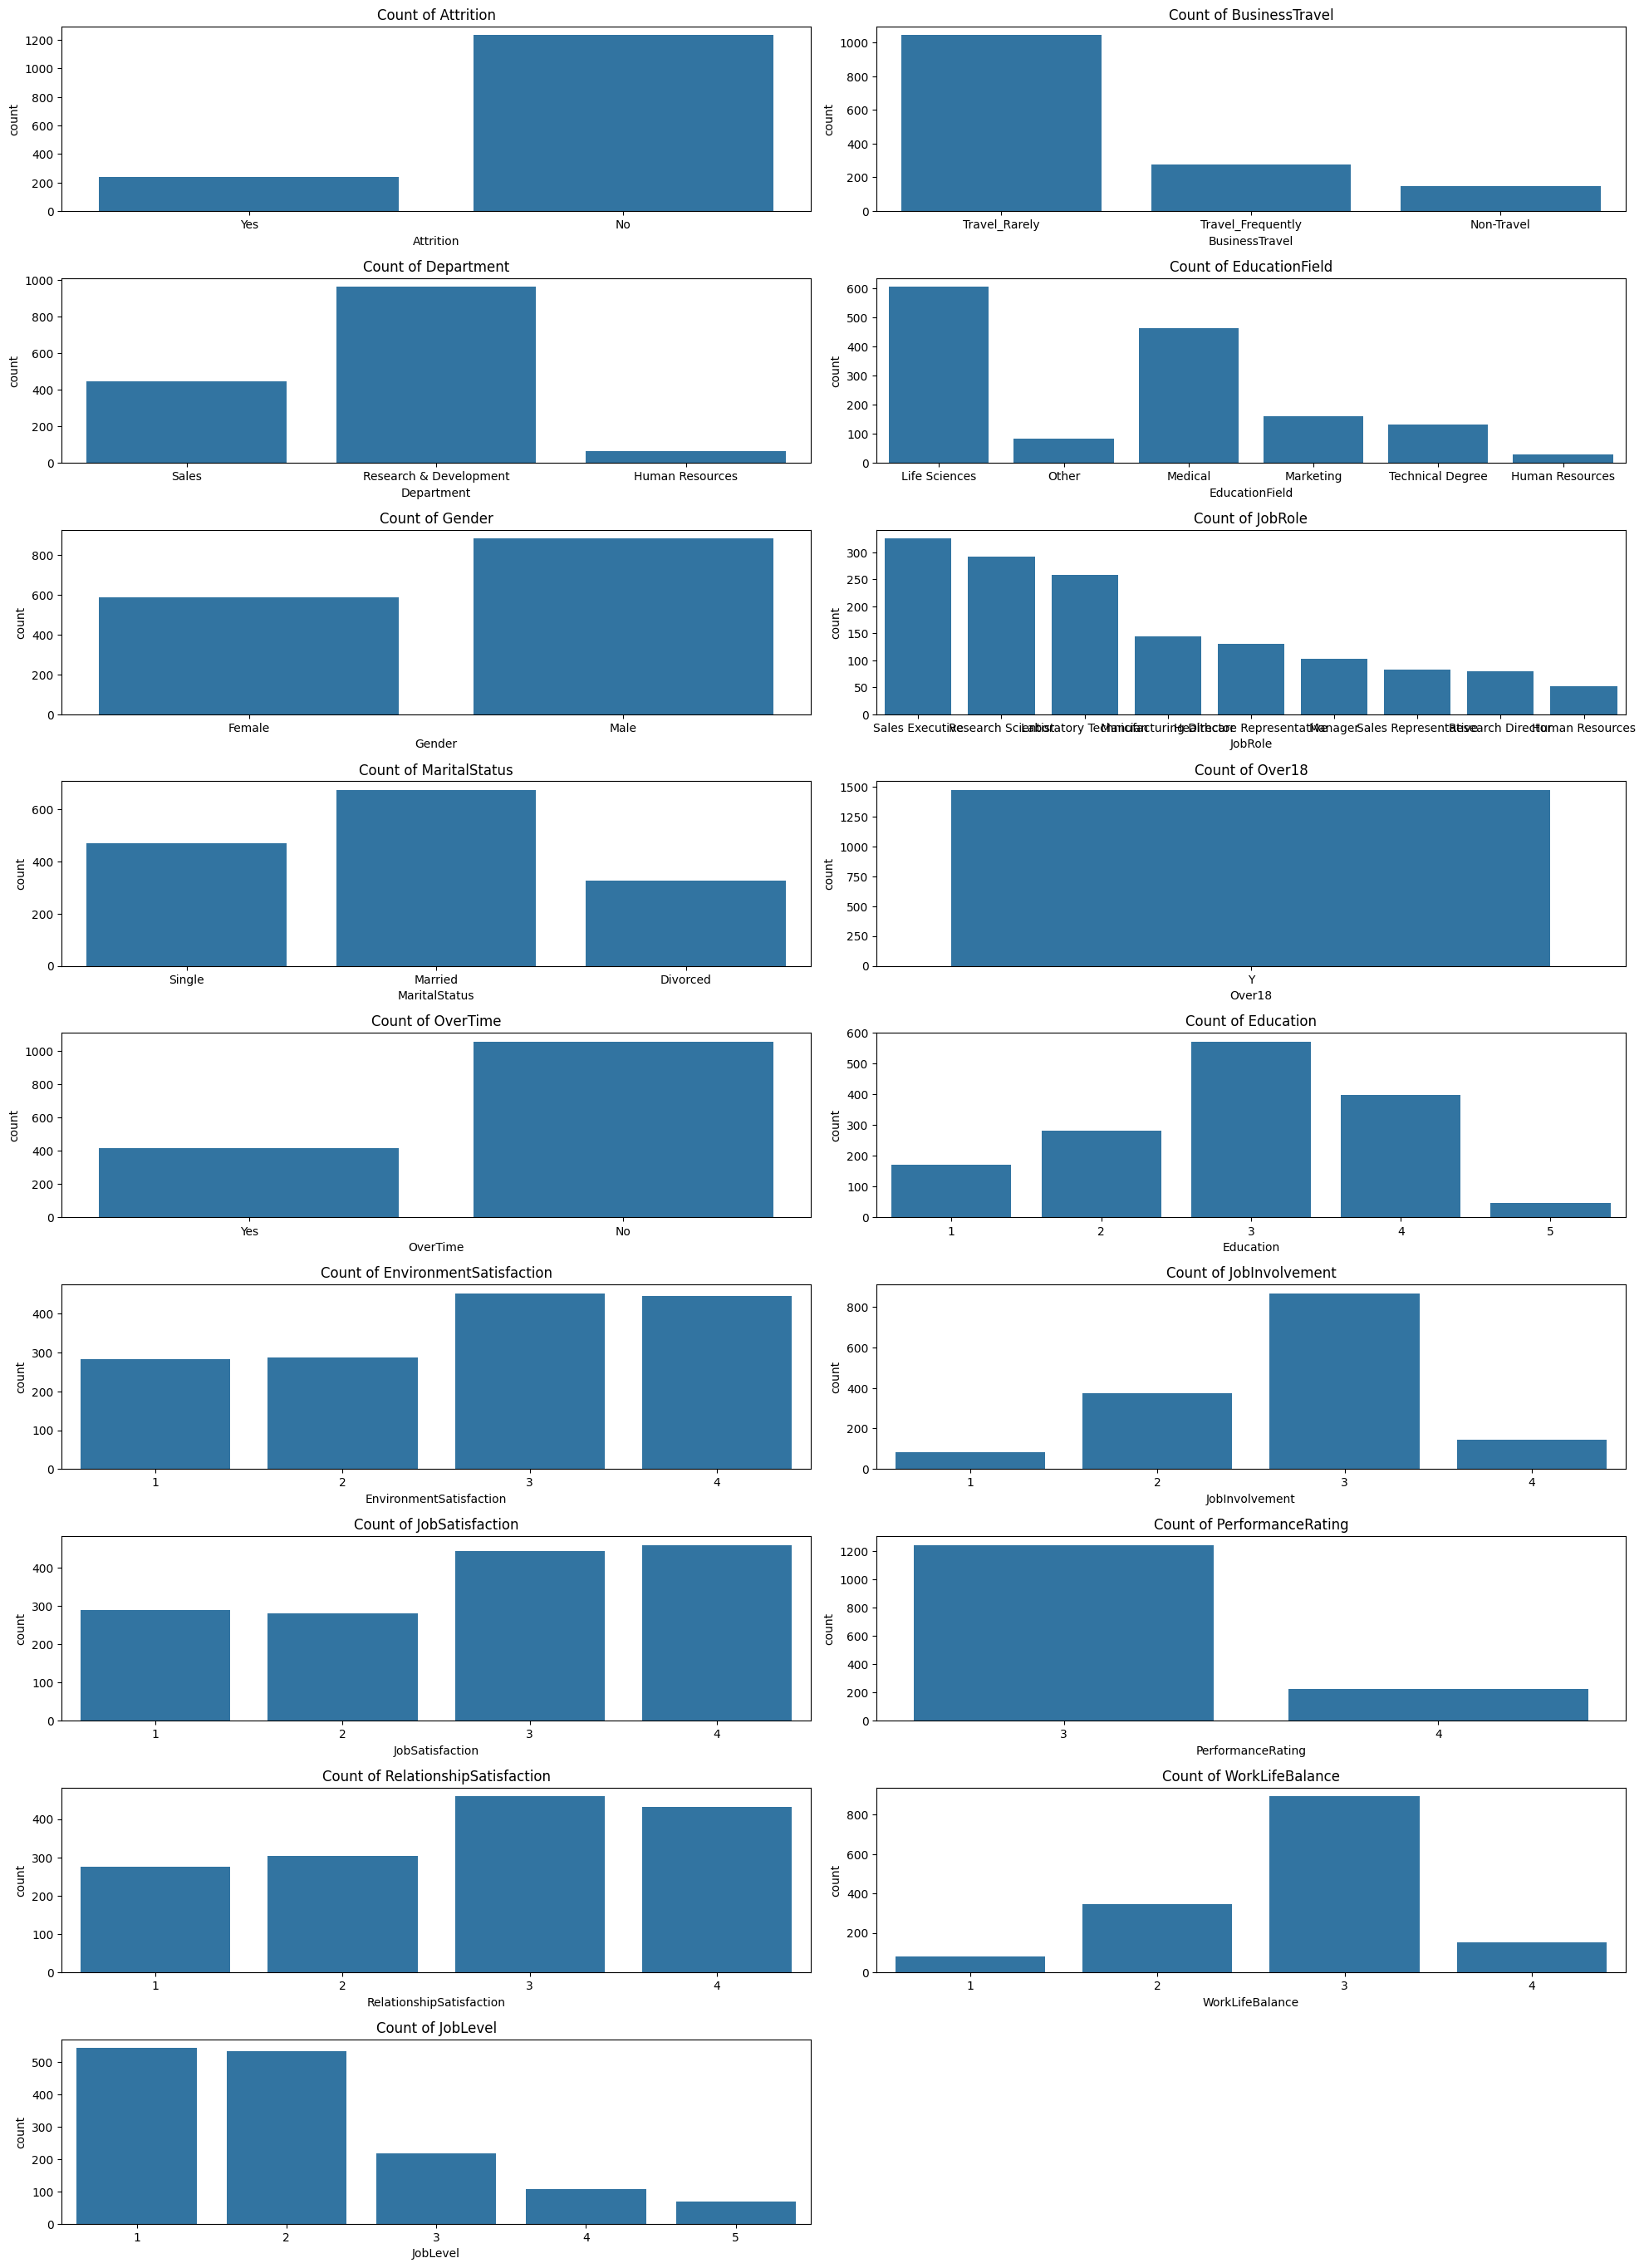

In [5]:
# count plot to see the frequency or count of each category
cate_cols = data.select_dtypes(include = object)

cate_cols = pd.concat([cate_cols, data[['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                                        'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                                        'WorkLifeBalance','JobLevel']]], axis=1)
# The plot
i=1
plt.figure(figsize=(20, 30))
for col in cate_cols.columns:
    plt.subplot(10,2,i)
    sns.countplot( x=col,data =cate_cols )
    plt.title(f'Count of {col}')
    plt.ylabel('count')
    plt.xlabel(col)
    i+=1
plt.tight_layout()
plt.show()

# Data cleaning and feature engineering
> ### Data cleaing
  * delete columns from a dataset that have only one unique value
  * replace long values  with shorter abbreviations ('Human Resources'->'HR')
  *  Handle Outliers and skewing

> ### Feature engineering
  * create dummy/indicator variables (also known as one-hot encoding) for categorical columns in a dataset.
  * creating PCA of the dataset
  * creat new features based on the old features

In [6]:
# delete columns from a dataset that have only one unique value
clean_data =data.copy()
clean_data.drop(['Over18','EmployeeCount' , 'StandardHours'],axis=1,inplace=True)
clean_data.shape

(1470, 32)

In [7]:
# replace long values  with shorter abbreviations

# in column 'BusinessTravel'
clean_data['BusinessTravel'].replace({
    'Travel_Rarely':'R',
    'Travel_Frequently':'F',
    'Non-Travel':'N'
},inplace=True)
# in column 'Department'
clean_data['Department'].replace({
    'Research & Development':'Re&De',
    'Human Resources':'HR'
},inplace=True)
#in column 'JobRole'
clean_data['JobRole'].replace({
    'Sales Executive':'SE',
    'Research Scientist':'RS',
    'Laboratory Technician':'LT',
    'Manufacturing Director': 'MD',
    'Healthcare Representative':'Healthcare',
    'Sales Representative': 'SR',
    'Research Director':'RD',
    'Human Resources':'HR'
},inplace=True)
clean_data['EducationField'].replace({
    'Life Sciences':'LE',
    'Technical Degree':'TD',
    'Human Resources':'HR'
},inplace=True)

clean_data['JobRole'].value_counts(),clean_data['Department'].value_counts(),clean_data['BusinessTravel'].value_counts(),clean_data['EducationField'].value_counts()

(JobRole
 SE            326
 RS            292
 LT            259
 MD            145
 Healthcare    131
 Manager       102
 SR             83
 RD             80
 HR             52
 Name: count, dtype: int64,
 Department
 Re&De    961
 Sales    446
 HR        63
 Name: count, dtype: int64,
 BusinessTravel
 R    1043
 F     277
 N     150
 Name: count, dtype: int64,
 EducationField
 LE           606
 Medical      464
 Marketing    159
 TD           132
 Other         82
 HR            27
 Name: count, dtype: int64)

In [8]:
# Handle Outliers and skewing

columns_to_transform = [
    'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager']                 # most of the chosen columns right skew or have an outlier value

# applies both a log transformation and standardization
for col in columns_to_transform:
    clean_data[col] = np.log1p(clean_data[col])
    clean_data[col] = (clean_data[col]-np.mean(clean_data[col]))/np.std(clean_data[col])

After the log transformation, the code standardizes the data by subtracting the mean and dividing by the standard deviation.

 This scales the data so that each column has a mean of 0 and a standard deviation of 1.

---

In [9]:
# Feature engineering

#create dummies
all_dummy_data = pd.get_dummies(clean_data,drop_first=True)

all_dummy_data.shape

(1470, 46)

In [10]:
# Creating PCA of the dataset


# using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_dummy_data)

# Create a PCA object, aiming to retain 95% of the variance in the data
pca = PCA(n_components=0.95)
# Fit the PCA model to the data and transform it into the reduced dimensionality space
data_reduced = pca.fit_transform(scaled_data)


eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the eigenvalues and explained variance ratio for analysis
print("Eigenvalues (Variance explained by each component):", eigenvalues)
print("Explained variance ratio:", explained_variance_ratio)

Eigenvalues (Variance explained by each component): [5.28326878 3.51170692 2.12642873 2.06373985 1.80023596 1.61721219
 1.55024147 1.35308981 1.30636445 1.29733329 1.22571209 1.1939194
 1.17712665 1.14216545 1.1337845  1.09447248 1.05958833 1.02731259
 1.01761229 1.00561744 0.97740017 0.96560984 0.94139123 0.92466133
 0.89416805 0.88315951 0.8717255  0.85436004 0.79595266 0.75291783
 0.68354864 0.6340584  0.51878888 0.50298984]
Explained variance ratio: [0.11477554 0.07628952 0.04619526 0.04483339 0.03910894 0.03513287
 0.03367798 0.02939499 0.02837991 0.02818371 0.02662779 0.02593711
 0.0255723  0.02481279 0.02463072 0.02377669 0.02301886 0.02231769
 0.02210696 0.02184638 0.02123338 0.02097724 0.0204511  0.02008766
 0.01942521 0.01918606 0.01893766 0.01856041 0.01729155 0.01635664
 0.01484964 0.0137745  0.01127035 0.01092712]


In [11]:
# creat new features based on the old features

# dividing "Age" column into regions
bins = [20, 30, 40, 50, 100]
labels = ["20's", "30's", "40's", "50's"]
clean_data['Age_range'] = pd.cut(clean_data['Age'], bins=bins, labels=labels, right=False)

# dividing "MonthlyIncome" column into regions
bins = [0, 5000, 10000, 15000, 20000, 100000]
labels = ["<5k", "5k-10k", "10k-15k", "15k-20k", "20k+"]
clean_data['MonthlyIncome_range'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels, right=False)

# dividing "TotalWorkingYears" column into regions
bins = [0, 10, 20, 30, 40, 50]
labels = ["<10", "10-20", "20-30", "30-40", "40+"]
clean_data['experience'] = pd.cut(data['TotalWorkingYears'], bins=bins, labels=labels, right=False)

# dividing "YearsSinceLastPromotion" column into regions
bins = [0, 5, 10, 15, 20]
labels = ["<5", "5-10", "10-15", "15+"]
clean_data['last_promotion'] = pd.cut(data['YearsSinceLastPromotion'], bins=bins, labels=labels, right=False)


# dividing "YearsSinceLastPromotion" column into regions
bins = [0, 5, 10, 15, 20]
labels = ["<5", "5-10", "10-15", "15+"]
clean_data['experienceInCurrentRole'] = pd.cut(data['YearsInCurrentRole'], bins=bins, labels=labels, right=False)


clean_data['Age_range'].value_counts(),clean_data['MonthlyIncome_range'].value_counts(),clean_data['experience'].value_counts(),clean_data['last_promotion'].value_counts(),clean_data['experienceInCurrentRole'].value_counts()

(Age_range
 30's    622
 40's    349
 20's    309
 50's    173
 Name: count, dtype: int64,
 MonthlyIncome_range
 <5k        749
 5k-10k     440
 10k-15k    148
 15k-20k    133
 20k+         0
 Name: count, dtype: int64,
 experience
 <10      721
 10-20    512
 20-30    184
 30-40     51
 40+        2
 Name: count, dtype: int64,
 last_promotion
 <5       1210
 5-10      188
 10-15      59
 15+        13
 Name: count, dtype: int64,
 experienceInCurrentRole
 <5       912
 5-10     451
 10-15     86
 15+       21
 Name: count, dtype: int64)

# Key Findings of the data
* major factors that affect Attrition of employees
* hypothesis testing

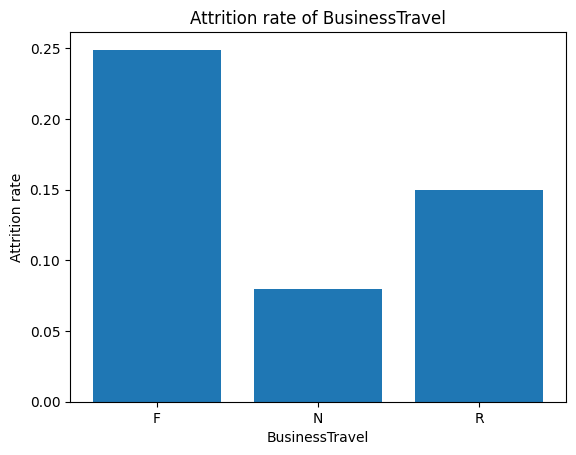

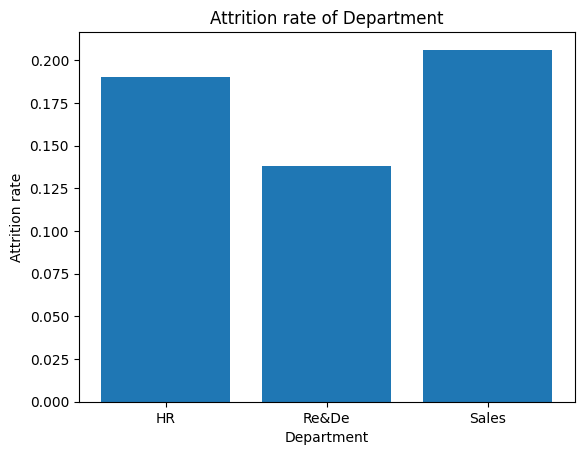

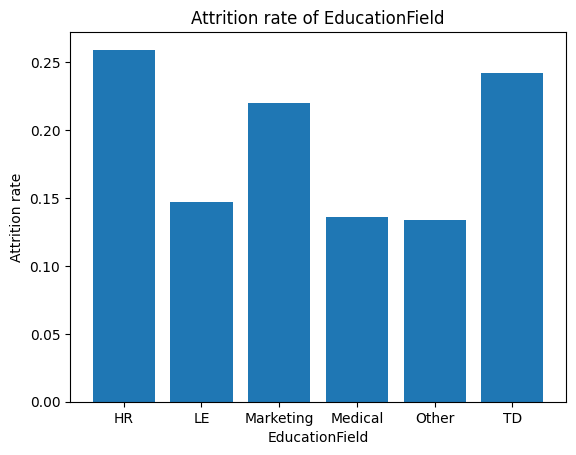

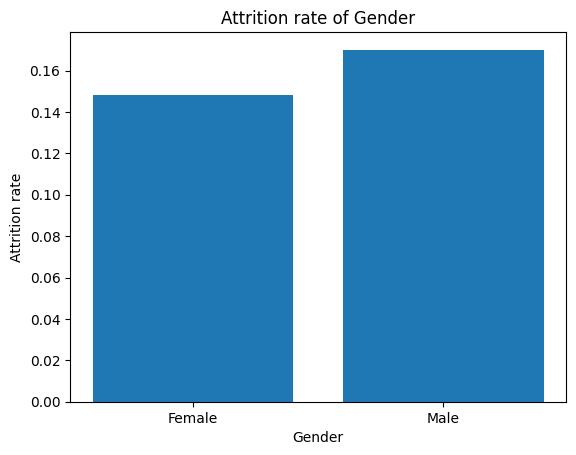

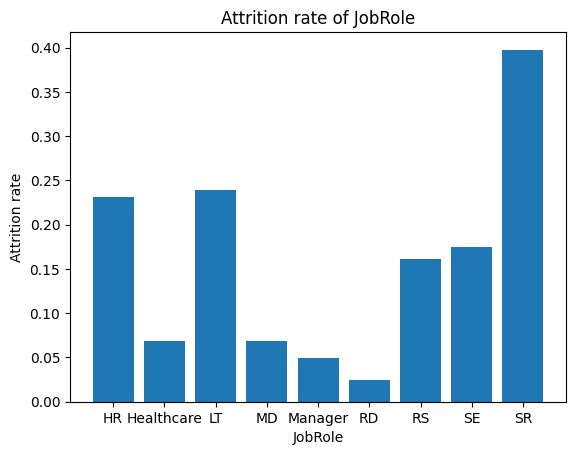

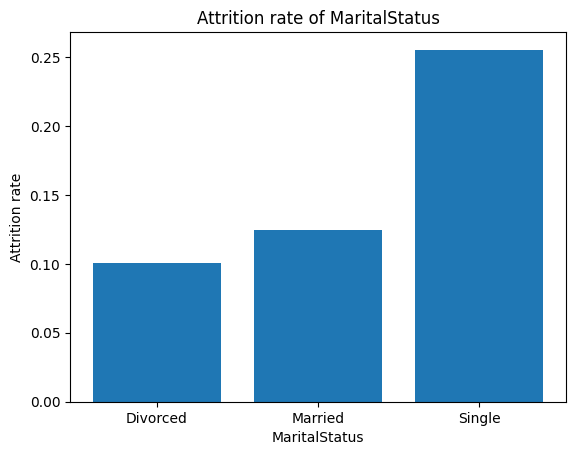

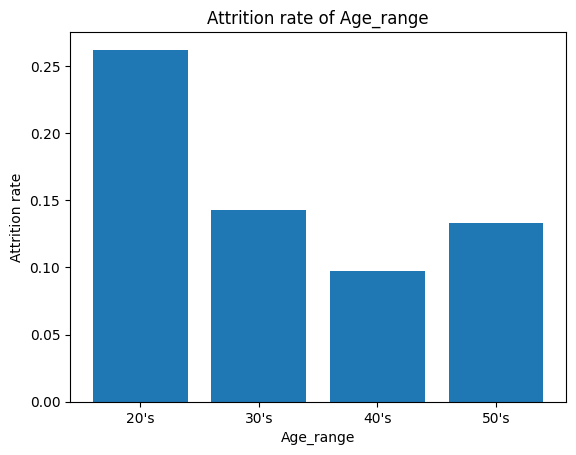

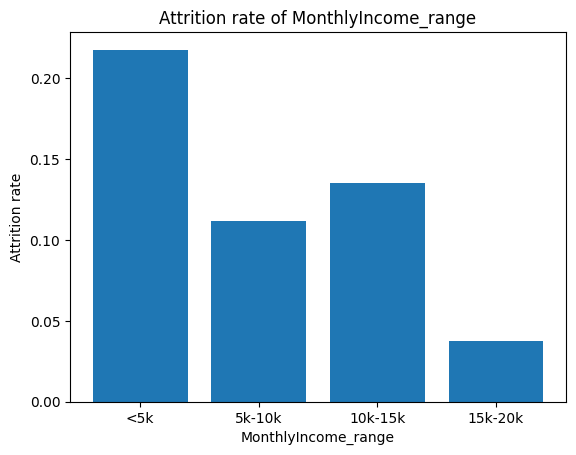

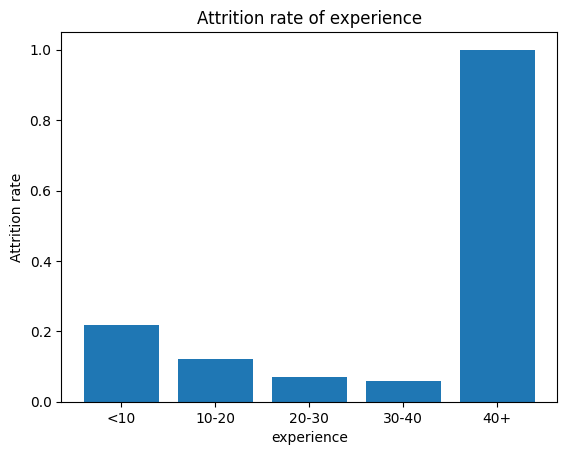

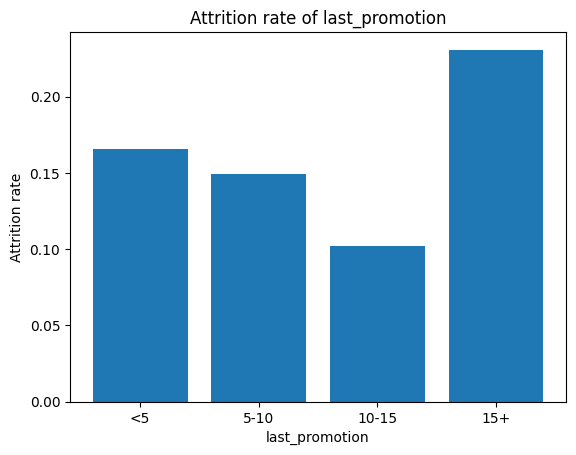

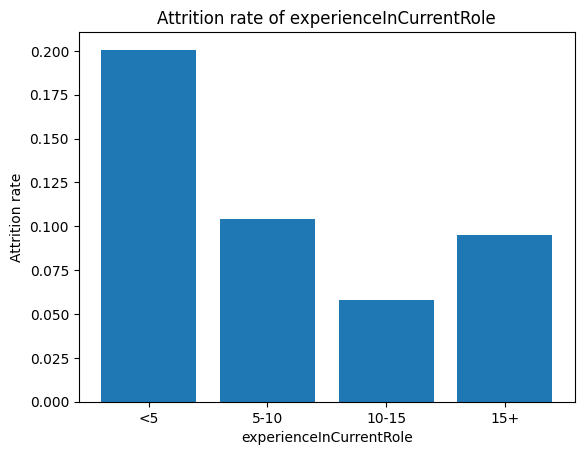

In [12]:
# Plot the relationship between each categorical variable Attrition rate
target_col = 'Attrition'

clean_data.replace({'Yes':1,'No':0},inplace=True)
cate_cols = clean_data.select_dtypes(['object','category'])

for col in cate_cols.columns:
    if (col ==target_col ):
        continue
    # Aggregate data by the categorical variable and  Attrition rate
    attr_count = clean_data.groupby(col, observed=True)[target_col].sum()
    total_count = clean_data.groupby(col, observed=True)[target_col].count()
    attr_rate = attr_count / total_count

    # Plot

    plt.bar(attr_rate.index,attr_rate.values)
    plt.title(f'Attrition rate of {col}')
    plt.ylabel('Attrition rate')
    plt.xlabel(col)
    plt.show()


- The attrition rate for the '40+' experience category shows 100% attrition. However, this result is based on a very small sample size of only 2 employees. Consequently, this high attrition rate may not accurately reflect broader trends and could be misleading due to the limited data in this category.

- Employees in Their 20s: This age group shows a higher attrition rate, indicating that employees in their 20s are more likely to leave the organization compared to those in other age brackets.

- Employees Earning <$5k: Employees earning less than  5,000 also exhibit higher attrition rates. This suggests that those with lower monthly incomes are more prone to leaving the company.
-Employees in Sales: The attrition rate is notably higher among employees working in the Sales department.

- Single Employees: Single employees also exhibit a higher attrition rate. This indicates that employees who are single have a greater propensity to leave the organization compared to their married counterparts.
---

# hypothesis testing
 ### 1 - The attrition rate is different for males and females
 ### 2 - Difference in Attrition Rates by Income Brackets
 ### 3 - Impact of Job Role or Department on Attrition

 > note : using the Chi-Square Test of Independence & p-value = 0.05

In [ ]:
# The attrition rate is different for males and females

# Null Hypothesis (H₀): The attrition rate is the same for males and females.
# Alternative Hypothesis (H₁): The attrition rate is different for males and females.

test_table = pd.crosstab(clean_data['Gender'],clean_data['Attrition'])

chi2,p,dof,ex = stats.chi2_contingency(test_table,correction=False)
p

0.25879037049115644

0.258 > 0.05 then There is not enough evidence to reject the null hypothesis, suggesting that attrition rates do not differ significantly between males and females.

---

In [ ]:
#  Difference in Attrition Rates by Income Brackets

# H₀ (Null Hypothesis): Attrition rates are independent of income brackets
# H₁ (Alternative Hypothesis): Attrition rates are dependent on income brackets

test_table = pd.crosstab(clean_data['MonthlyIncome_range'],clean_data['Attrition'])

chi2,p,dof,ex = stats.chi2_contingency(test_table,correction=False)
p

5.162710315354409e-09

5.19e-9 < 0.05 There is a significant relationship between income brackets and attrition rates, suggesting that different income brackets have different attrition rates.

---

In [ ]:
#  Impact of Job Role or Department on Attrition

# Null Hypothesis (H₀): There is no significant relationship between Department and Attrition.
# Alternative Hypothesis (H₁): There is a significant relationship between Department and Attrition.


test_table = pd.crosstab(clean_data['Department'],clean_data['Attrition'])

chi2,p,dof,ex = stats.chi2_contingency(test_table,correction=False)
p

0.004525606574479633

0.0045 < 0.05  There is a significant relationship between Department and Attrition. Different Department have different attrition rates.

---




#Uploading the `clean_data`, `all_dummy_data`, and `PCA` files.
These files can be used in machine learning models.can be found in the repository.





In [13]:
# Save the cleaned data to a CSV file
clean_data.to_csv('cleanData.csv', index=False)

# Save the dummy variables data to a CSV file

all_dummy_data.to_csv('dummies.csv', index=False)

# Convert the PCA-transformed data to a DataFrame
# Columns are named as 'PC1', 'PC2', etc., based on the number of principal components
reduced_df = pd.DataFrame(data_reduced, columns=[f'PC{i+1}' for i in range(data_reduced.shape[1])])

# Save the reduced DataFrame to a CSV file
reduced_df.to_csv('data_reduced.csv', index=False)

# Convert PCA eigenvalues to a DataFrame

eigenvalues_df = pd.DataFrame(pca.explained_variance_, columns=['Eigenvalue'])
# Save the eigenvalues DataFrame to a CSV file
eigenvalues_df.to_csv('eigenvalues.csv', index=False)

# Convert PCA explained variance ratio to a DataFrame

explained_variance_ratio_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
# Save the explained variance ratio DataFrame to a CSV file
explained_variance_ratio_df.to_csv('explained_variance_ratio.csv', index=False)


print('All files have been uploaded successfully.')


All files have been uploaded successfully.
